# Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re


df = pd.read_csv("lightcast_job_postings.csv") 
df = df[['body', 'remote_type_name']].dropna()

df['body_clean'] = df['body'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

## TF-IDF feature extraction

In [2]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['body_clean'])

In [3]:
df['is_remote'] = df['remote_type_name'].apply(lambda x: 1 if 'Remote' in str(x) else 0)

## Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['is_remote'], test_size=0.2, random_state=54)

## Naive Bayes Classifier

In [5]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     11270
           1       0.99      0.04      0.08      3221

    accuracy                           0.79     14491
   macro avg       0.89      0.52      0.48     14491
weighted avg       0.83      0.79      0.70     14491



## Insights_Naive Bayes Classifier

The classification report reveals that while the Naive Bayes model achieves a relatively high overall accuracy of 0.79, its performance is heavily skewed by class imbalance in the dataset. Specifically, the model is very good at identifying non-remote jobs (class 0), with a recall of 1.00, but it performs poorly on remote job predictions (class 1), with a recall of only 0.04. This means the model almost always fails to correctly detect remote jobs, even though its precision for class 1 is high at 0.99. This discrepancy suggests the model rarely predicts class 1 at all, and when it does, it’s correct—but it misses most of the actual remote postings. The imbalance is also evident from the support values, where non-remote jobs far outnumber remote ones. 

These results are helpful in data analysis as they highlight the limitations of using only text from job descriptions (body) as input features and the importance of addressing class imbalance. Without correcting for this, the model’s high accuracy can be misleading, and it may fail to capture valuable insights about the minority class, which is often the more important one in business contexts such as detecting remote work opportunities.

## Word Cloud of all job descriptions

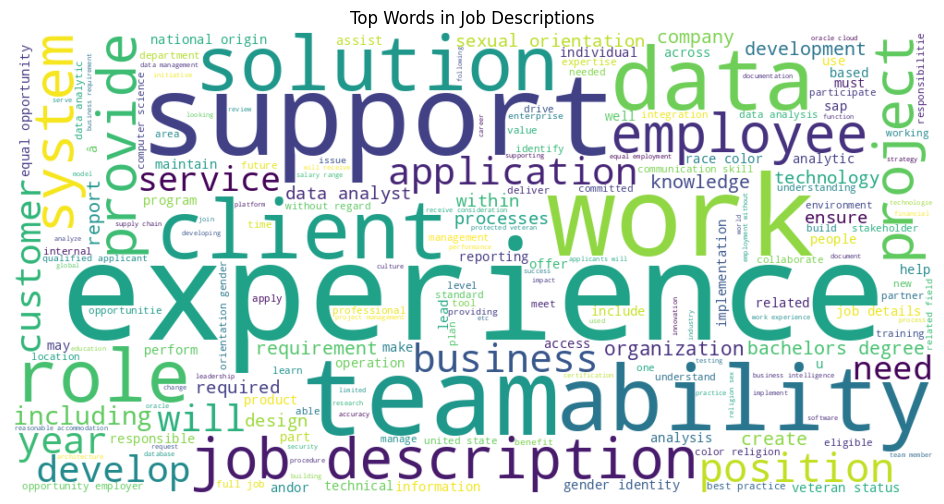

In [ ]:
text = " ".join(df['body_clean'].dropna().sample(2000, random_state=42))

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Job Descriptions")
clplt.show()

## Insights_Word Cloud

This word cloud visualizes the most frequent terms found in job descriptions across the dataset. Larger words appear more often, providing a quick overview of key skills, expectations, and workplace themes emphasized by employers. We can see that terms like “experience,” “support,” “client,” “team,” “data,” and “employee” are among the most dominant. This highlights a strong emphasis on both technical competencies (e.g., “data,” “system,” “application,” “project”) and soft skills or role expectations (e.g., “support,” “team,” “ability,” “work”).

The frequent appearance of words such as “requirement,” “knowledge,” “develop,” “solution,” and “processes” suggests that many job postings are focused on problem-solving and implementation roles, which aligns with the growing demand for technical professionals in business and analytics environments.

Interestingly, “employee,” “gender,” “veteran,” and “equal opportunity” also appear prominently, reflecting the use of standard compliance and diversity language commonly included in job descriptions. This mix of practical, interpersonal, and legal terms paints a holistic picture of what employers prioritize when recruiting.

# Recommendations for Job Seekers

1. Highlight Teamwork and Communication Skills

The most frequent words—like “team,” “support,” “client,” “ability,” and “communication”—suggest that employers place high value on interpersonal skills, even for technical roles. Tip: In your resume and interviews, emphasize your ability to work in teams, communicate clearly, and support client success.

2. Emphasize Hands-On Experience

Terms like “experience,” “processes,” “develop,” and “project” appear frequently, underscoring that employers seek candidates with real-world application of skills, not just academic knowledge. Tip: If you're early in your career, consider showcasing internships, capstone projects, or personal GitHub work to demonstrate applied experience.

3. Learn and Reference Data-Related Tools

Words like “data,” “analysis,” “technology,” “system,” and “solution” were common, suggesting many roles—even outside of traditional data science—require data fluency. Tip: Familiarize yourself with tools like Excel, SQL, Python, or even platforms like Tableau or Power BI. Mention them in your resume if applicable.

4.  Include Industry Keywords in Your Resume

Recruiters and applicant tracking systems (ATS) often filter resumes using keyword matching. By incorporating words like “application,” “integration,” “development,” or “support”, you increase your chances of passing initial screenings. Tip: Customize your resume using job description terms to improve keyword alignment.

5. Be Aware of Diversity & Compliance Language

Terms such as “equal opportunity,” “veteran,” “gender,” and “race” appear because of standardized legal disclosures. Tip: While these may not require response, they signal that employers are increasingly formalizing DEI commitments. If applicable, consider including involvement in diverse workplace initiatives or inclusive team projects.